### Learning Objectives



1.   Import dataset from drive
2.   Inspect dataset path
2.   Import parts needed to create simple CNN model
2.   Train the newly created CNN model
2.   Test the model
2.   Create a new model with a slight change in architecture
2.   Test the new model




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#change directory to the folder where the images are stored on google drive
%cd /content/drive/MyDrive/Colab Notebooks/cat-dog-dataset

/content/drive/.shortcut-targets-by-id/1a_3EykFabFmU3A138qIMvnKQ80vOWkkT/cat-dog-dataset


In [ ]:
#check the current directory
!pwd

/content/drive/.shortcut-targets-by-id/1a_3EykFabFmU3A138qIMvnKQ80vOWkkT/cat-dog-dataset


In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer, Conv2D,MaxPool2D
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path="/content/drive/MyDrive/Colab Notebooks/cat-dog-dataset/train"
test_path="/content/drive/MyDrive/Colab Notebooks/cat-dog-dataset/test"
val_path="/content/drive/MyDrive/Colab Notebooks/cat-dog-dataset/val"

In [ ]:
import os
import cv2
x_train=[]
for folder in os.listdir(train_path):
  sub_path=train_path+"/"+folder
  for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(64,64)) # resized for uniformity, smaller than orig can mean loss of features/ data, bigger can introduce funky features (that might not actually exist)
    x_train.append(img_arr)

In [ ]:
image_path

'/content/drive/MyDrive/Colab Notebooks/cat-dog-dataset/train/dog/dog.1340.jpg'

In [ ]:
x_test=[]
for folder in os.listdir(test_path):
  sub_path=test_path+"/"+folder
  for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(64,64))
    x_test.append(img_arr)

In [ ]:
x_val=[]
for folder in os.listdir(val_path):
  sub_path=val_path+"/"+folder
  for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(64,64))
    x_val.append(img_arr)

In [ ]:
# Import the NumPy module
import numpy as np
# Convert the lists into NumPy arrays
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
#must be divided by 255.0 for normalization.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,target_size = (64, 64), batch_size = 32, class_mode = 'sparse')

Found 5003 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path, target_size = (64, 64), batch_size = 32, class_mode = 'sparse')

Found 1600 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_path, target_size = (64,64), batch_size = 32, class_mode = 'sparse')

Found 373 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((5003,), (1600,), (373,))

In [ ]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
  print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : cat
1 : dog


View some sample training images

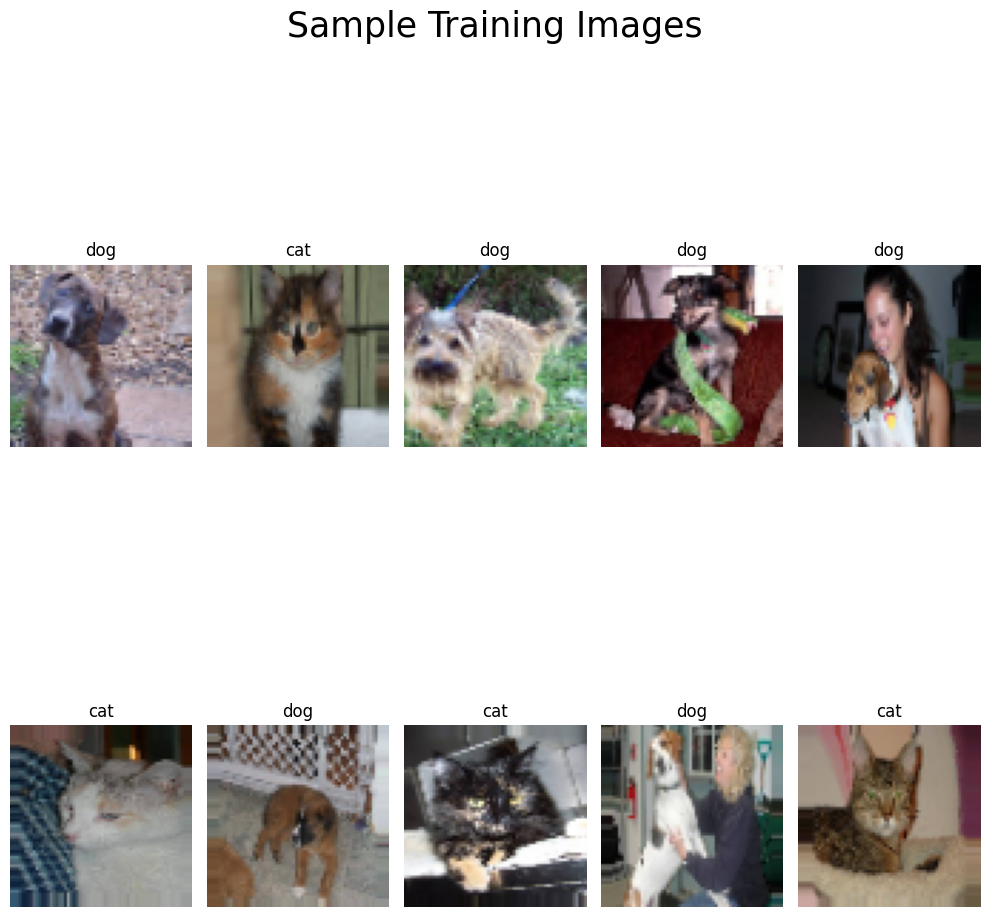

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 12))
idx = 0
for i in range(2):
  for j in range(5):
    #label = labels[np.argmax(training_set[0][1][idx])]
    label = labels[training_set[0][1][idx]]
    ax[i, j].set_title(f"{label}")
    ax[i, j].imshow(training_set[0][0][idx][:, :, :])
    ax[i, j].axis("off")
    idx += 1
plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=25)
plt.show()

# Build the model

### Task

Question: How many layers are in the convolutional block of the CNN? <br>
Answer:
There are 4 layers in the convolutional block:

1st Conv2D layer (5 filters)

1st MaxPool2D layer

2nd Conv2D layer (32 filters)

2nd MaxPool2D layer

Question: How many layers are in the fully-connected block of the CNN? <br>
Answer
There are 2 layers in the fully-connected block:

1st Dense layer (128 units with ReLU activation)

2nd Dense layer (2 units with softmax activation - output layer)

In [ ]:
import keras
import tensorflow
print(keras.__version__)
print(tensorflow.__version__)

3.10.0
2.19.0


In [ ]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.InputLayer(input_shape=[64, 64, 3])) #change shape to input_shape
cnn.add(tf.keras.layers.Conv2D(filters=5, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=2, activation='softmax'))
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 5)      │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,814 (3.07 MB)

 Trainable params: 804,814 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min',
verbose=1, patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
# Saving to Google Drive
model_file = '/content/drive/MyDrive/Colab Notebooks/best_cnn_model.keras'

In [ ]:
model_check_point = ModelCheckpoint(model_file, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = cnn.fit(
training_set,
validation_data=val_set ,
epochs=10,
callbacks=[early_stopping_monitor, model_check_point],
batch_size=32,shuffle=True)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.6645 - loss: 0.6167
Epoch 1: val_loss improved from inf to 0.60242, saving model to /content/drive/MyDrive/Colab Notebooks/best_cnn_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.6646 - loss: 0.6166 - val_accuracy: 0.7024 - val_loss: 0.6024
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.6855 - loss: 0.5810
Epoch 2: val_loss improved from 0.60242 to 0.58784, saving model to /content/drive/MyDrive/Colab Notebooks/best_cnn_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 179ms/step - accuracy: 0.6856 - loss: 0.5810 - val_accuracy: 0.7024 - val_loss: 0.5878
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7132 - loss: 0.5501
Epoch 3: val_loss did not improve from 0.58784
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 179ms/step - accuracy: 0.7133 - loss: 0.5500 - val_accuracy: 0.6649 - val_loss: 0.6516
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7294 - lo

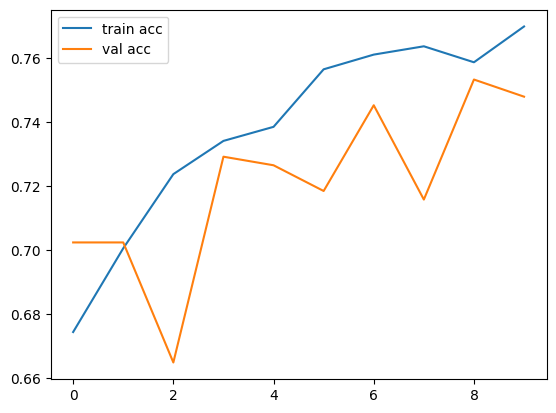

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
# Plot the accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

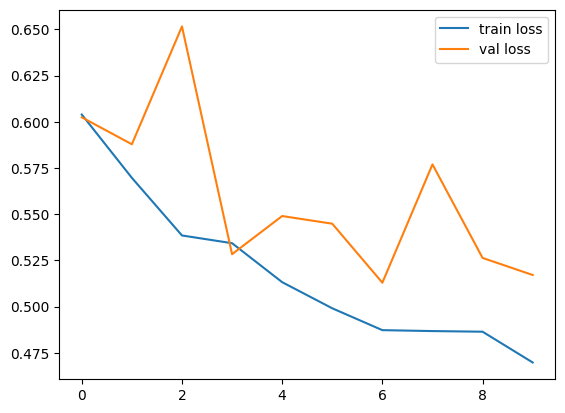

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Test the model

In [ ]:
from keras.models import load_model

# Use the full path where you saved the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/best_cnn_model.keras')


In [ ]:
# Evaluate the model on the test data
model.evaluate(test_set, batch_size=32)

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.7640 - loss: 0.5087


[0.5021867156028748, 0.7581250071525574]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report( test_y, y_pred))
#get confusion matrix
print(confusion_matrix(test_y, y_pred))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.37      0.51       800
           1       0.60      0.93      0.73       800

    accuracy                           0.65      1600
   macro avg       0.72      0.65      0.62      1600
weighted avg       0.72      0.65      0.62      1600

[[294 506]
 [ 56 744]]


In [ ]:
predictions = model.predict(test_x)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


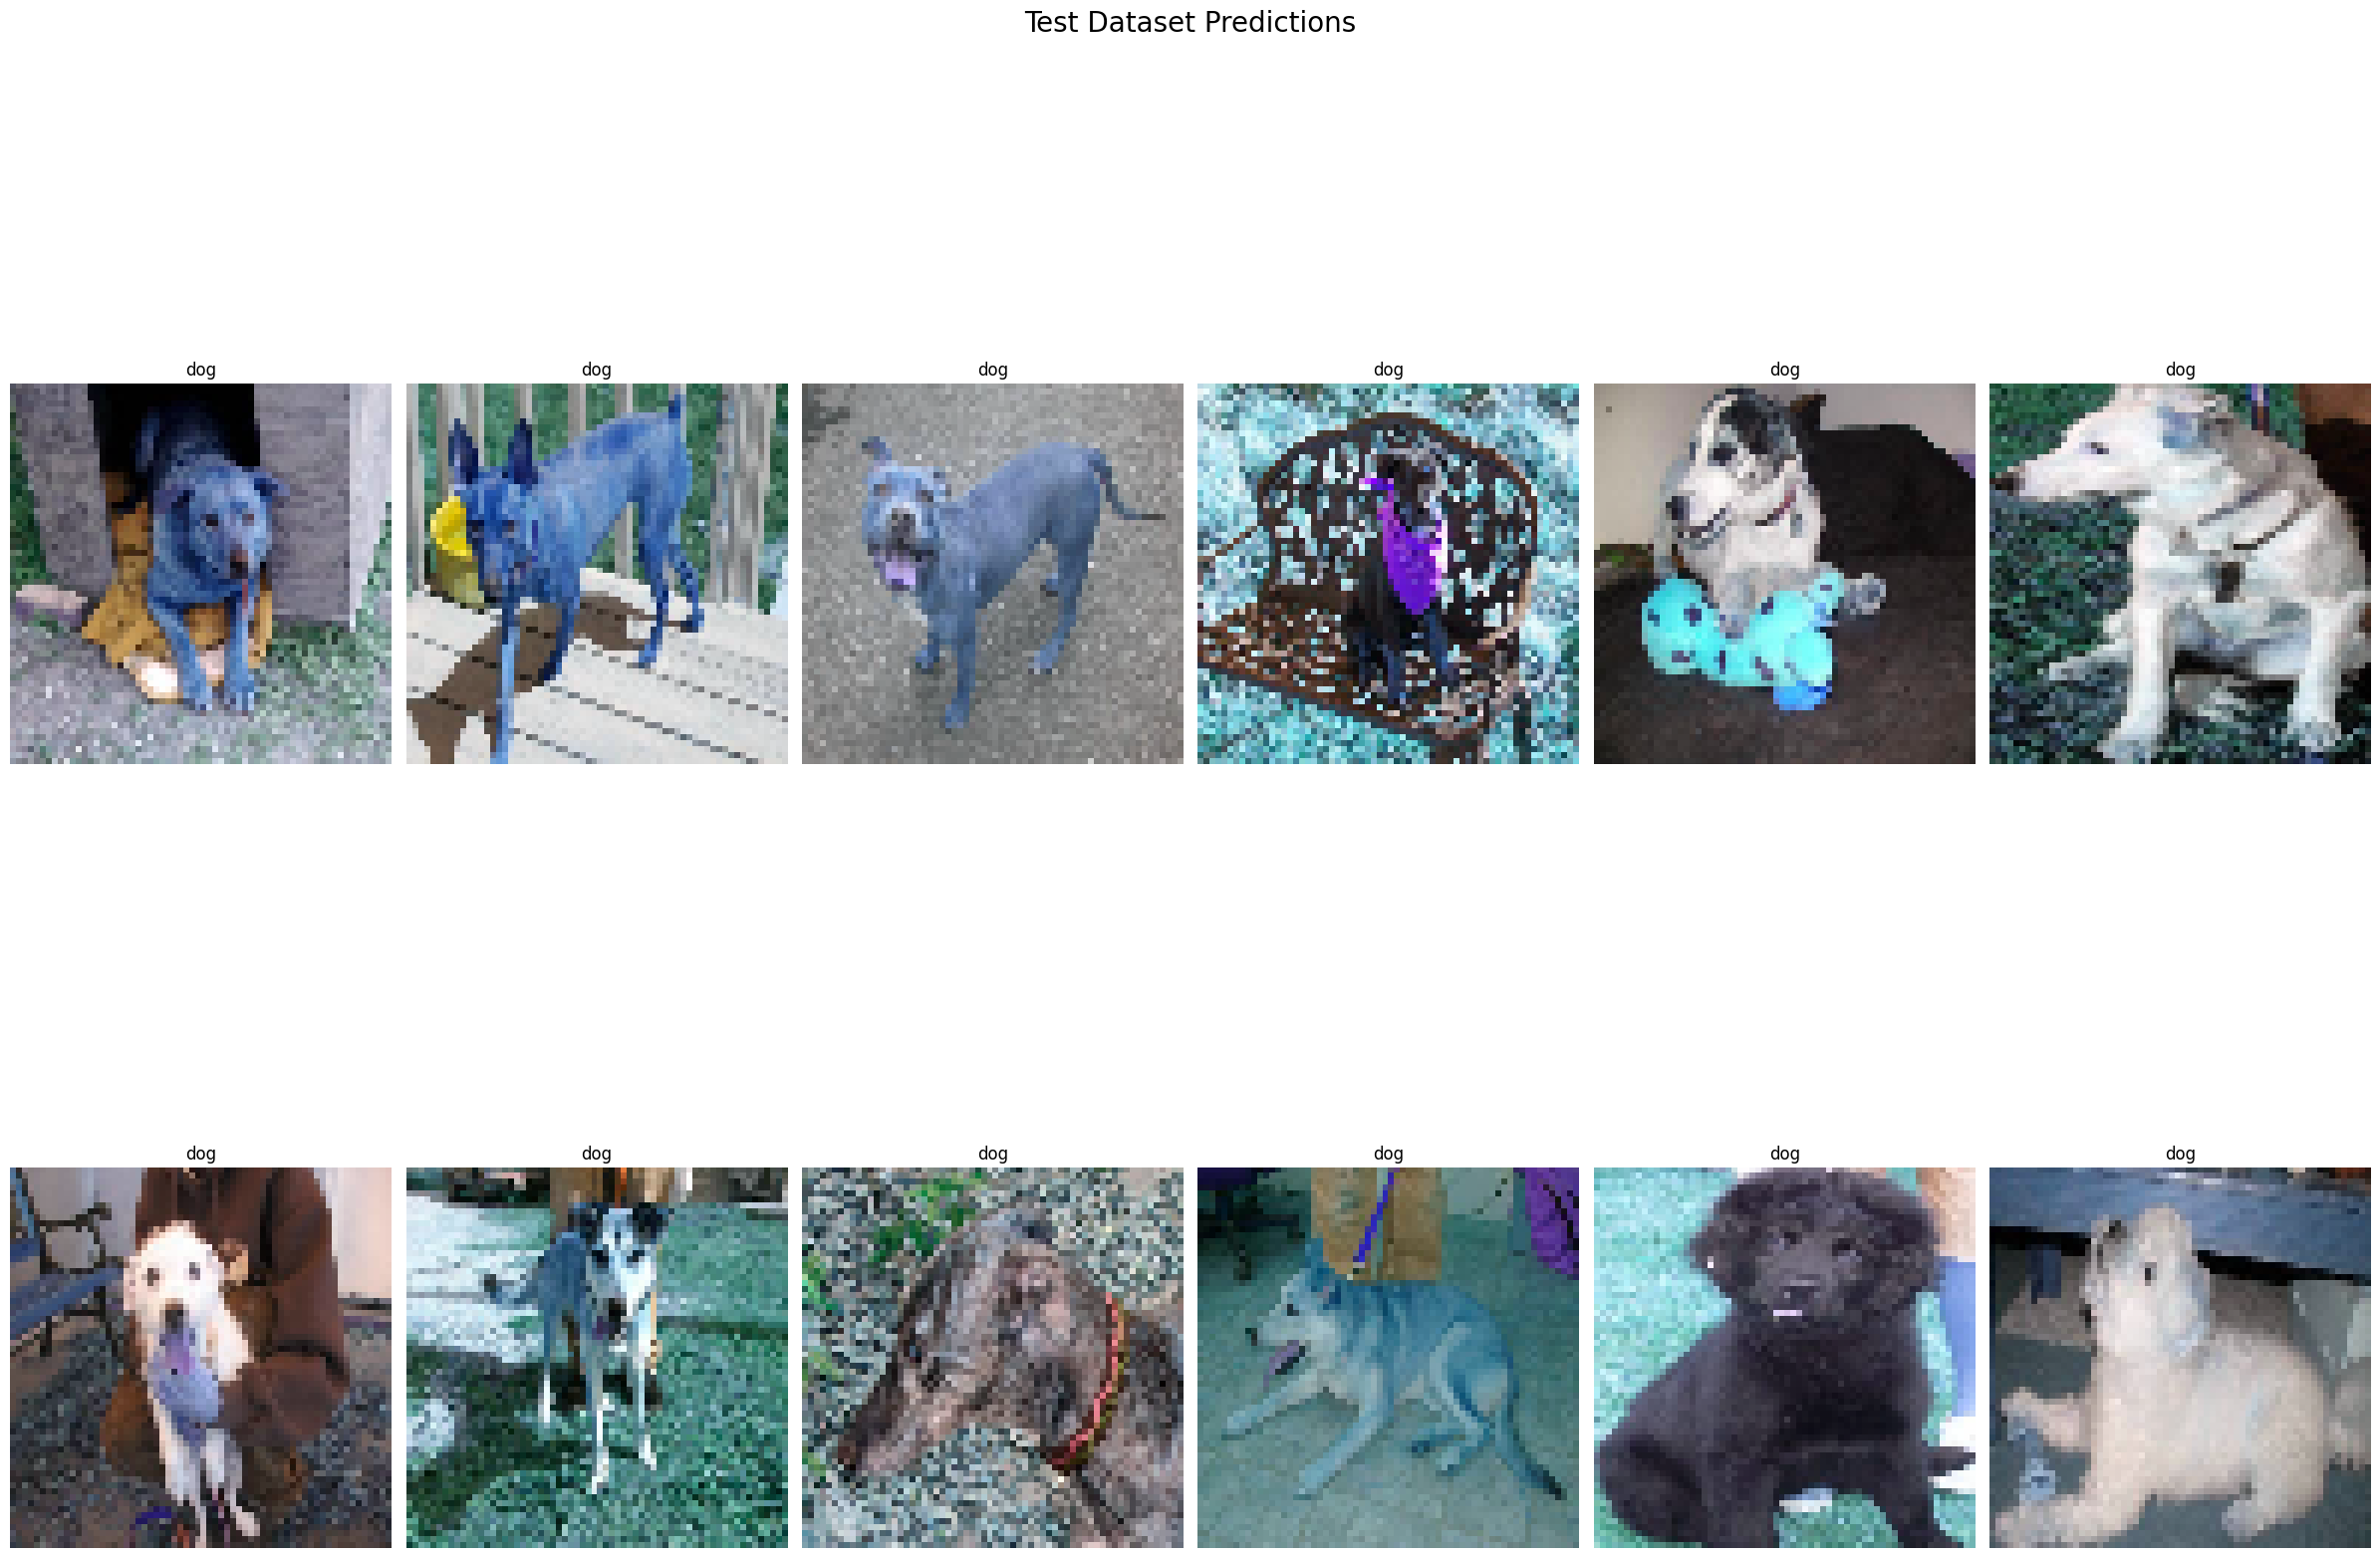

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(24, 20))
idx = 860
for i in range(2):
  for j in range(6):
    predicted_label = labels[np.argmax(predictions[idx])]
    ax[i, j].set_title(f"{predicted_label}")
    ax[i, j].imshow(test_x[idx])
    ax[i, j].axis("off")
    idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

### Task

Question: Create another model with the same architecture as above. Add 4 more Dense layers. What effect does this have on the accuracy of classification? <br>

Answer:

Adding 4 more Dense layers to the model is likely to have the following effects:

Increased Model Complexity: The model now has 6 Dense layers in the fully-connected block (compared to the original 2), significantly increasing the number of trainable parameters.

Potential Overfitting: With more parameters and a relatively small dataset (cat-dog classification), the deeper model is more prone to overfitting. This means it may perform well on training data but poorly on validation/test data.
Accuracy Impact:
The training accuracy may increase or stay similar

The validation/test accuracy may decrease or show larger gaps compared to training accuracy due to overfitting

The model may memorize training patterns rather than learning generalizable features


Training Time: The model will take longer to train due to more parameters to update.

Recommendation: For this relatively simple binary classification task (cats vs dogs) with limited data, the original simpler architecture is likely more appropriate. Adding regularization techniques (Dropout layers, L2 regularization) would be more beneficial than simply adding more Dense layers.

